In [82]:
# Set up
from bloom import BloomFilter, CustomBloomFilterHashFunctions
from benchmark_bloom import generate_random_dna_sequences, generate_random_words, benchmark_false_positive_rate, random_string
import matplotlib.pyplot as plt

# Evaluate functionality of hash functions
- Uniformity 
- Indepencence

A chi-squared test was used to ensure the hash functions are uniformly distributed for a given number of inputs, ideally there should be no statistical stignificant difference between the distribution of the hash functions (p<0.05). Similarly, there should be no to weak correlation between the hash functions.

Hash Function 1: Chi2 = 9.11, p-value = 0.43
Hash Function 2: Chi2 = 2.74, p-value = 0.97
Hash Function 3: Chi2 = 6.43, p-value = 0.70
Hash Function 4: Chi2 = 4.24, p-value = 0.90
Hash Function 5: Chi2 = 1.97, p-value = 0.99
Hash Function 6: Chi2 = 1.15, p-value = 1.00
Hash Function 7: Chi2 = 4.65, p-value = 0.86
Hash Function 8: Chi2 = 6.92, p-value = 0.65
Hash Function 9: Chi2 = 4.13, p-value = 0.90
Hash Function 10: Chi2 = 3.72, p-value = 0.93


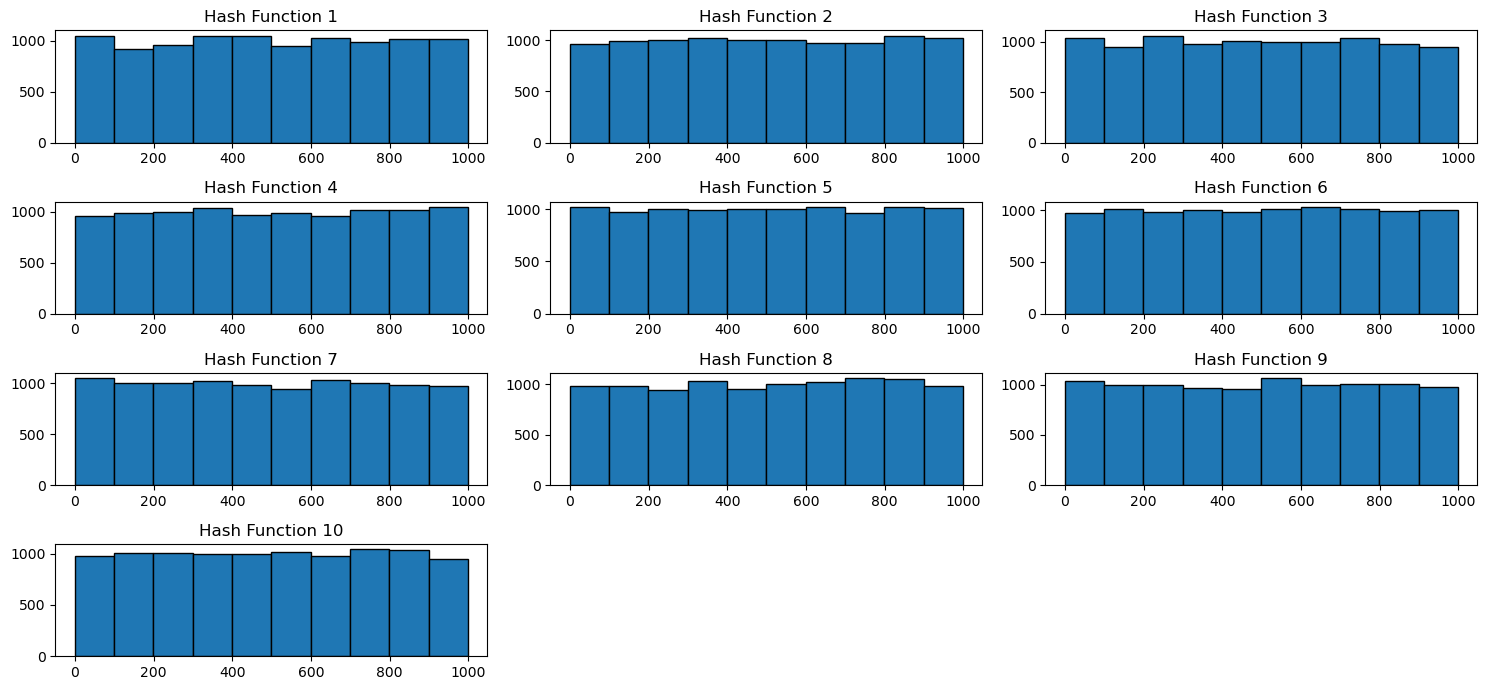

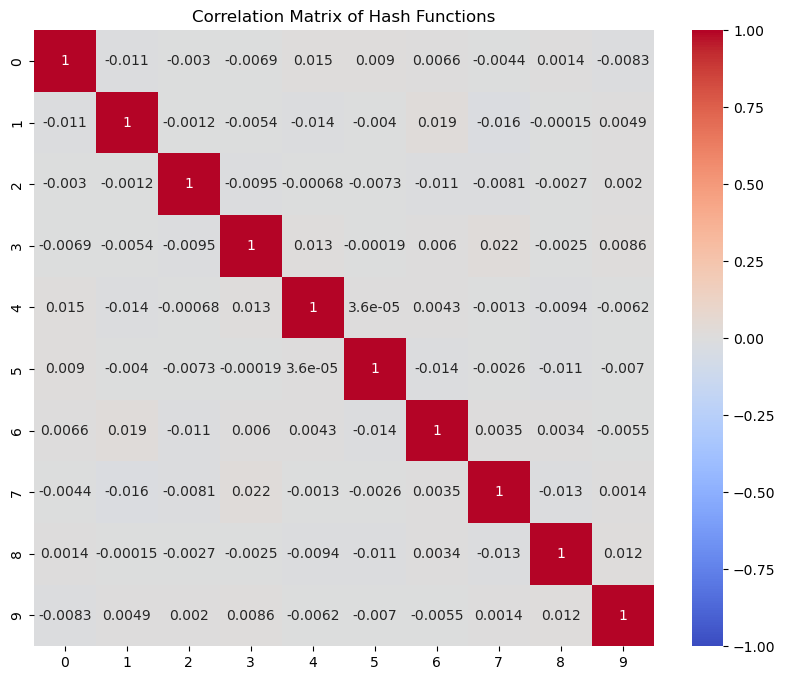

In [73]:
## Evaluate Uniformity of hash functions

bf_size = 1000

num_hashes = 10

# generate random string
random_data = [random_string() for _ in range(10000)]

hashes = CustomBloomFilterHashFunctions(bf_size, num_hashes)



hashes.check_uniformity_with_chisquare(random_data)


In [74]:
# Test bloom filter with DNA data
dna_data = generate_random_dna_sequences(10, 10)
look_up_data = generate_random_dna_sequences(30, 10)

bloom_filter = BloomFilter(100, 5)

for seq in dna_data:
    bloom_filter.add(seq)

for seq in look_up_data:
    if bloom_filter.check(seq):
        print(f'{seq} possible in filter with false positive rate of about {bloom_filter.calculate_false_positive_rate() * 100: .4f}%')
    else:
        print(f'{seq} definitely not in bloom filter')

CACCCGTGAC definitely not in bloom filter
TTCCACATAT definitely not in bloom filter
ATGTTTGTGC definitely not in bloom filter
GGAATGCCGG definitely not in bloom filter
GTTGTTACCA definitely not in bloom filter
CGCATTGCGT definitely not in bloom filter
AATCCCACGT definitely not in bloom filter
CATCGGGACT definitely not in bloom filter
GGTAGGGGGT definitely not in bloom filter
CAGCCATTTC definitely not in bloom filter
CGATCATCAT definitely not in bloom filter
CATTCATATC definitely not in bloom filter
TAGTTAGACT definitely not in bloom filter
CGAGTAGGAG definitely not in bloom filter
AGAGATAGCG definitely not in bloom filter
TCGTTGTCGC definitely not in bloom filter
TTATGAGCCG definitely not in bloom filter
ATTGTGAGAG definitely not in bloom filter
TACCGGTTCG definitely not in bloom filter
CCTTTTATGA definitely not in bloom filter
CCTCAGCAAA definitely not in bloom filter
GATCATCGTT possible in filter with false positive rate of about  0.9615%
TCAAACTACT definitely not in bloom filter
CAC

In [75]:
# Test bloom filter with natural words
word_list = generate_random_words(20)
look_up_data = generate_random_words(20)

# word_list
bloom_filter = BloomFilter(1000, 5)
for word in word_list:
    bloom_filter.add(word)

for word in look_up_data:
    if bloom_filter.check(word):
        print(f'{word} possible in filter with false positive rate of about {bloom_filter.calculate_false_positive_rate() * 100:.4f}%')
    else:
        print(f'{word} definitely not in bloom filter')

dark definitely not in bloom filter
board definitely not in bloom filter
image definitely not in bloom filter
answer definitely not in bloom filter
grow definitely not in bloom filter
thank definitely not in bloom filter
go definitely not in bloom filter
above definitely not in bloom filter
daughter definitely not in bloom filter
support definitely not in bloom filter
reflect definitely not in bloom filter
whatever definitely not in bloom filter
grow definitely not in bloom filter
fund definitely not in bloom filter
put definitely not in bloom filter
our definitely not in bloom filter
almost definitely not in bloom filter
table definitely not in bloom filter
recently definitely not in bloom filter
book definitely not in bloom filter


# Evaluate the false positive rate

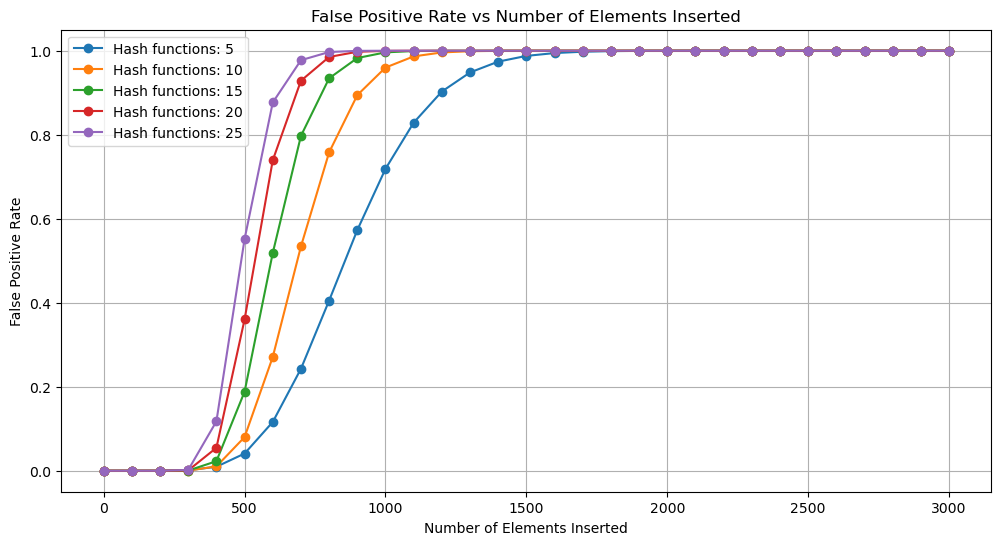

In [77]:

def benchmark_false_positive_rate(expected_n, max_n, step, hash_funcs_list, word_list):
    results = []

    word_list_extended = word_list * (max_n // len(word_list) + 1)

    for num_hashes in hash_funcs_list:
        bloom_filter = BloomFilter(expected_n * 10, num_hashes)
        current_results = {'num_inserted': [], 'false_positive_rate': [], 'num_hashes': num_hashes}

        for n in range(0, max_n + 1, step):
            insert_data = word_list_extended[:n]

            # Insert elements
            for item in insert_data:
                bloom_filter.add(item)

            # Calculate false positive rate
            false_positive_rate = bloom_filter.calculate_false_positive_rate()

            current_results['num_inserted'].append(n)
            current_results['false_positive_rate'].append(false_positive_rate)

        results.append(current_results)

    return results

def plot_results(results):
    plt.figure(figsize=(12, 6))

    for result in results:
        plt.plot(result['num_inserted'], result['false_positive_rate'], marker='o', label=f"Hash functions: {result['num_hashes']}")

    plt.xlabel('Number of Elements Inserted')
    plt.ylabel('False Positive Rate')
    plt.title('False Positive Rate vs Number of Elements Inserted')
    plt.legend()
    plt.grid(True)
    plt.show()

# Example usage
word_list = generate_random_words(1000)  # Dummy word list
expected_n = 1000
max_n = 3000
step = 100
hash_funcs_list = [5, 10, 15, 20, 25]  # Different numbers of hash functions to test

results = benchmark_false_positive_rate(expected_n, max_n, step, hash_funcs_list, word_list)
plot_results(results)


{'False Positive Probability': 1.420090870641739e-12,
 'Optimal Number of Hash Functions': 236.59423763112798,
 'Compression Rate': 0.0029296875}

# Compression Rate

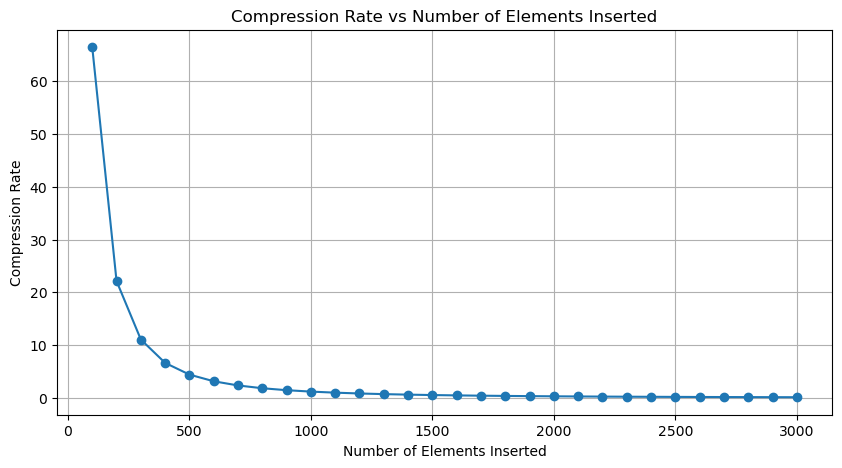

In [84]:
import numpy as np
import matplotlib.pyplot as plt

# Sample word list (as a substitute for nltk.words)
word_list = ["hello", "world", "test", "bloom", "filter", "algorithm", "data", "structure", "python", "benchmark"]


def benchmark_compression_rate(expected_n, max_n, step, p):
    size = int(-expected_n * np.log(p) / (np.log(2) ** 2))  # Size of the Bloom filter
    bloom_filter = BloomFilter(size, 7)
    results = {'num_inserted': [], 'compression_rate': []}
    
    word_list_extended = word_list * (max_n // len(word_list) + 1)

    for n in range(0, max_n + 1, step):
        insert_data = word_list_extended[:n]

        # Insert elements
        for item in insert_data:
            bloom_filter.add(item)

        # Calculate compression rate
        compression_rate = bloom_filter.calculate_compression_rate()

        results['num_inserted'].append(n)
        results['compression_rate'].append(compression_rate)

    return results

expected_n = 1000
max_n = 3000
step = 100
p = 0.01  # False positive rate
results = benchmark_compression_rate(expected_n, max_n, step, p)

def plot_results(results):
    plt.figure(figsize=(10, 5))

    plt.plot(results['num_inserted'], results['compression_rate'], marker='o')
    plt.xlabel('Number of Elements Inserted')
    plt.ylabel('Compression Rate')
    plt.title('Compression Rate vs Number of Elements Inserted')

    plt.grid(True)
    plt.show()

plot_results(results)

